# Lab 02 : Logistic Regression and KNN Classifier

## 1. IntroductionCustomer Attrition or Churn

Customer Attrition

Customer attrition, also known as customer churn, customer turnover, or customer defection, is the loss of clients or customers.

Telephone service companies, Internet service providers, pay TV companies, insurance firms, and alarm monitoring services, often use customer attrition analysis and customer attrition rates as one of their key business metrics because the cost of retaining an existing customer is far less than acquiring a new one. Companies from these sectors often have customer service branches which attempt to win back defecting clients, because recovered long-term customers can be worth much more to a company than newly recruited clients.

Companies usually make a distinction between voluntary churn and involuntary churn. Voluntary churn occurs due to a decision by the customer to switch to another company or service provider, involuntary churn occurs due to circumstances such as a customer's relocation to a long-term care facility, death, or the relocation to a distant location. In most applications, involuntary reasons for churn are excluded from the analytical models. Analysts tend to concentrate on voluntary churn, because it typically occurs due to factors of the company-customer relationship which companies control, such as how billing interactions are handled or how after-sales help is provided.

predictive analytics use churn prediction models that predict customer churn by assessing their propensity of risk to churn. Since these models generate a small prioritized list of potential defectors, they are effective at focusing customer retention marketing programs on the subset of the customer base who are most vulnerable to churn.

In [1]:
#Importing libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt#visualization
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

## 2. Data

In [2]:
telcom = pd.read_csv("telecom.csv")
pd.set_option('display.max_columns',35)
#first few rows
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Data Description at: https://towardsdatascience.com/predicting-customer-churn-using-logistic-regression-c6076f37eaca

## 3. Data Overview

In [3]:
print ("Rows     : " ,telcom.shape[0])
print ("Columns  : " ,telcom.shape[1])
print ("\nFeatures : \n" ,telcom.columns.tolist())
print ("\nMissing values :  ", telcom.isnull().sum())
print ("\nUnique values :  \n",telcom.nunique())
print ("\nData Types :  \n",telcom.dtypes)

Rows     :  7043
Columns  :  21

Features : 
 ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values :   customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Unique values :  
 customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents     

## 4. PRE PROCESSING

In [4]:
telcom.head(20)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


## 4.1 Dealing with Total Charges

In [5]:
print (len(telcom[telcom['TotalCharges'] == " "]))

11


In [6]:
#Replacing spaces with null values in total charges column
telcom['TotalCharges'] = telcom["TotalCharges"].replace(" ",np.nan)

#Dropping null values from total charges column 
telcom = telcom[telcom["TotalCharges"].notnull()]
telcom = telcom.reset_index()[telcom.columns]

#convert to float type
telcom["TotalCharges"] = telcom["TotalCharges"].astype(float)

## 4.2 'Replace No Internet Service' with 'No'

in 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies' coulmns

In [7]:
telcom['OnlineSecurity'].value_counts()

No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64

In [8]:
#replace 'No internet service' to No for the following columns
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    telcom[i]  = telcom[i].replace({'No internet service' : 'No'})
    

## 4.3 'Convert SeniorCitizen' to Object Type

In [9]:
telcom["SeniorCitizen"].dtype

dtype('int64')

In [10]:
#replace values
telcom["SeniorCitizen"] = telcom["SeniorCitizen"].replace({1:"Yes",0:"No"})

In [11]:
telcom["SeniorCitizen"].dtype

dtype('O')

## 4.4 Make Categories in Tenure Column

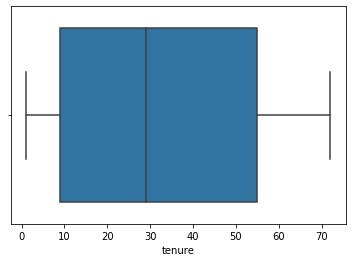

In [12]:
sns.boxplot(telcom["tenure"])

In [13]:
#Tenure to categorical column
def tenure_lab(telcom) :
    
    if telcom["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (telcom["tenure"] > 12) & (telcom["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (telcom["tenure"] > 24) & (telcom["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (telcom["tenure"] > 48) & (telcom["tenure"] <= 60) :
        return "Tenure_48-60"
    elif telcom["tenure"] > 60 :
        return "Tenure_gt_60"
telcom["tenure_group"] = telcom.apply(lambda telcom:tenure_lab(telcom),
                                      axis = 1)

In [14]:
telcom["tenure_group"].value_counts()

Tenure_0-12     2175
Tenure_24-48    1594
Tenure_gt_60    1407
Tenure_12-24    1024
Tenure_48-60     832
Name: tenure_group, dtype: int64

In [15]:
del telcom['tenure']

In [16]:
telcom.dtypes

customerID           object
gender               object
SeniorCitizen        object
Partner              object
Dependents           object
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
tenure_group         object
dtype: object

In [17]:
telcom.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         2
OnlineBackup           2
DeviceProtection       2
TechSupport            2
StreamingTV            2
StreamingMovies        2
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
tenure_group           5
dtype: int64

## 4.5 Separating catagorical and numerical columns

In [20]:
Id_col     = ['customerID']
target_col = ["Churn"]
cat_cols   = telcom.nunique()[telcom.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
num_cols   = [x for x in telcom.columns if x not in cat_cols + target_col + Id_col]

In [21]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'tenure_group']

In [22]:
num_cols

['MonthlyCharges', 'TotalCharges']

In [23]:
Id_col 

['customerID']

In [24]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,tenure_group
0,7590-VHVEG,Female,No,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No,Tenure_0-12
1,5575-GNVDE,Male,No,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No,Tenure_24-48
2,3668-QPYBK,Male,No,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,Tenure_0-12
3,7795-CFOCW,Male,No,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No,Tenure_24-48
4,9237-HQITU,Female,No,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,Tenure_0-12


## 4.6 Feature Encoding

In [25]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


bin_cols   = telcom.nunique()[telcom.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

#Label encoding Binary columns
le = LabelEncoder()
for i in bin_cols :
    telcom[i] = le.fit_transform(telcom[i])
    
#Duplicating columns for multi value columns
telcom = pd.get_dummies(data = telcom,columns = multi_cols )

In [26]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,0,0,1,29.85,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,0,0,0,56.95,1889.50,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,0,0,1,53.85,108.15,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,0,0,0,42.30,1840.75,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0
4,9237-HQITU,0,0,0,0,1,0,0,0,0,0,0,1,70.70,151.65,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0


## 4.7 Feature Scaling / Normalization

In [27]:
#Scaling Numerical columns
std = StandardScaler()
scaled = std.fit_transform(telcom[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [28]:
scaled

,MonthlyCharges,TotalCharges
0,-1.161694,-0.994194
1,-0.260878,-0.173740
2,-0.363923,-0.959649
3,-0.747850,-0.195248
4,0.196178,-0.940457
5,1.158489,-0.645369
6,0.807802,-0.147313
7,-1.165018,-0.874169
8,1.329677,0.336516
9,-0.287470,0.531476


In [29]:
#dropping original values merging scaled values for numerical columns
df_telcom_og = telcom.copy()
telcom = telcom.drop(columns = num_cols,axis = 1)
telcom = telcom.merge(scaled,left_index=True,right_index=True,how = "left")

In [30]:
telcom.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_Tenure_0-12,tenure_group_Tenure_12-24,tenure_group_Tenure_24-48,tenure_group_Tenure_48-60,tenure_group_Tenure_gt_60,MonthlyCharges,TotalCharges
0,7590-VHVEG,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,-1.161694,-0.994194
1,5575-GNVDE,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,-0.260878,-0.173740
2,3668-QPYBK,1,0,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,-0.363923,-0.959649
3,7795-CFOCW,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,-0.747850,-0.195248
4,9237-HQITU,0,0,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0.196178,-0.940457


## 5. Train -Test Split

In [31]:
del telcom['customerID']

In [32]:
telcom['target']=telcom['Churn']
del telcom['Churn']

In [33]:
Y=telcom['target'].values

In [34]:
del telcom['target']

In [35]:
Y.shape

(7032,)

In [36]:
Y=Y.reshape(-1,1)

In [37]:
X=telcom.values

In [38]:
X

array([[ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -1.16169394, -0.99419409],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.26087792, -0.17373982],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
        -0.36392329, -0.95964911],
       ...,
       [ 0.        ,  0.        ,  1.        , ...,  0.        ,
        -1.17000405, -0.85451414],
       [ 1.        ,  1.        ,  1.        , ...,  0.        ,
         0.31916782, -0.87209546],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.35793167,  2.01234407]])

In [39]:
from sklearn.model_selection import train_test_split
xtrain , xtest , ytrain, ytest =train_test_split(X,Y,test_size=0.2,random_state=42 )

In [40]:
print("xtrain shape : ", xtrain.shape) 
print("xtest shape  : ", xtest.shape) 
print("ytrain shape : ", ytrain.shape) 
print("ytest shape  : ", ytest.shape) 

xtrain shape :  (5625, 32)
xtest shape  :  (1407, 32)
ytrain shape :  (5625, 1)
ytest shape  :  (1407, 1)


## 6. Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve

model = LogisticRegression()
model.fit(xtrain,ytrain)
predictions=model.predict(xtest)
probabilities = model.predict_proba(xtest)

In [44]:
print ("\n Classification report : \n",classification_report(ytest,predictions))
print ("Accuracy Score   : ",accuracy_score(ytest,predictions))
model_roc_auc = roc_auc_score(ytest,predictions) 
print ("Area under curve : ",model_roc_auc)


 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.90      0.86      1033
           1       0.63      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407

Accuracy Score   :  0.7839374555792467
Area under curve :  0.6797228880111403


In [45]:
df = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted': predictions.flatten()})

In [1]:
df.head(25)

NameError: name 'df' is not defined

In [47]:
conf_matrix = confusion_matrix(ytest,predictions)
print (conf_matrix)

[[932 101]
 [203 171]]


Text(0.5, 1, 'CONFUSION MATRIX')

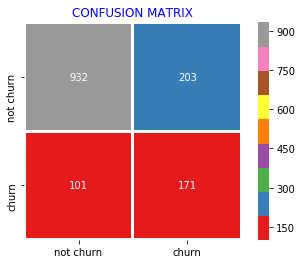

In [48]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(predictions,ytest)
sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
            xticklabels=["not churn","churn"],
            yticklabels=["not churn","churn"],linewidths = 2,linecolor = "w",cmap = "Set1")
plt.title("CONFUSION MATRIX",color = "b")

Area under curve :  0.6797228880111403


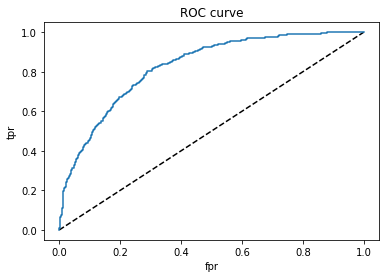

In [49]:
from sklearn import metrics
model_roc_auc = roc_auc_score(ytest,predictions) 
y_pred_proba = model.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(ytest, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
print ("Area under curve : ",model_roc_auc)
plt.show()

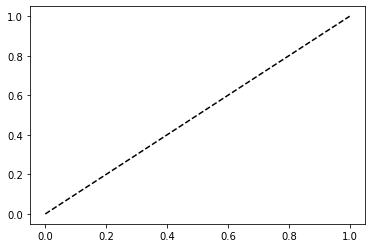

In [50]:
plt.plot([0,1],[0,1],'k--')

## 7. KNN ( K Nearest Neighbour)

In [51]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
#Train the model using the training sets 
knn.fit(xtrain, ytrain)

#Predict the response for test dataset
predictions  = knn.predict(xtest)
probabilities = model.predict_proba(xtest)

In [52]:
print ("\n Classification report : \n",classification_report(ytest,predictions))
print ("Accuracy Score   : ",accuracy_score(ytest,predictions))
model_roc_auc = roc_auc_score(ytest,predictions) 
print ("Area under curve : ",model_roc_auc)


 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1033
           1       0.52      0.50      0.51       374

    accuracy                           0.74      1407
   macro avg       0.67      0.66      0.67      1407
weighted avg       0.74      0.74      0.74      1407

Accuracy Score   :  0.7420042643923241
Area under curve :  0.6648112294288481


In [53]:
print ("\n Classification report : \n",classification_report(ytest,predictions))
print ("Accuracy Score   : ",accuracy_score(ytest,predictions))
model_roc_auc = roc_auc_score(ytest,predictions) 
print ("Area under curve : ",model_roc_auc)


 Classification report : 
               precision    recall  f1-score   support

           0       0.82      0.83      0.83      1033
           1       0.52      0.50      0.51       374

    accuracy                           0.74      1407
   macro avg       0.67      0.66      0.67      1407
weighted avg       0.74      0.74      0.74      1407

Accuracy Score   :  0.7420042643923241
Area under curve :  0.6648112294288481


In [54]:
df = pd.DataFrame({'Actual': ytest.flatten(), 'Predicted': predictions.flatten()})

In [55]:
df.head()

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0


Text(0.5, 1, 'CONFUSION MATRIX')

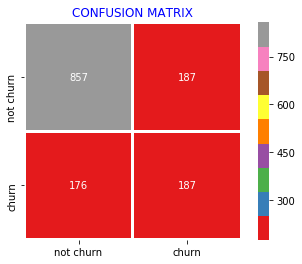

In [56]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
conf_matrix = confusion_matrix(predictions,ytest)
sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
            xticklabels=["not churn","churn"],
            yticklabels=["not churn","churn"],linewidths = 2,linecolor = "w",cmap = "Set1")
plt.title("CONFUSION MATRIX",color = "b")

Area under curve :  0.6648112294288481


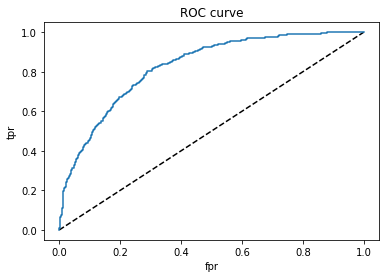

In [57]:
model_roc_auc = roc_auc_score(ytest,predictions) 
y_pred_proba = model.predict_proba(xtest)[:,1]
fpr, tpr, thresholds = metrics.roc_curve(ytest, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
print ("Area under curve : ",model_roc_auc)
plt.show()

In [58]:
pd.set_option('display.max_rows', 500)